In [2]:
import sys
sys.path.insert(0,'/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/')
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
from astropy.wcs import WCS
from scipy.ndimage import gaussian_filter

import pitszi

In [3]:
c = pitszi.Model(RA=60*u.deg-0.5*u.arcmin, Dec=60*u.deg+0.5*u.arcmin, redshift=0.5, M500=1e15*u.Msun, silent=False)
        
c.map_coord  = SkyCoord(60*u.deg, 60*u.deg, frame="icrs")
c.map_fov   = [10, 5]*u.arcmin
c.map_reso  = 2*u.arcsec
c.los_reso  = 12.576462897253872*u.kpc#20*u.kpc
c.R_truncation = c.R500*2

                        _  _    ___  ____ _                 
                  _ __ (_)| |_ / __||_  /(_)                
                 | '_ \| ||  _|\__ \ / / | |                
                 | .__/|_| \__||___//___||_|                
                 |_|                                        
   Probing ICM Turbulence from Sunyaev-Zel'dovich Imaging   
------------------------------------------------------------
Setting gNFW Planck coll. (2013) UPP.
Setting the map coordinates
Setting: map_header to None, as map properties are now set by hand
Setting the map field of view
Setting: map_header to None, as map properties are now set by hand
Setting the map resolution value
Setting: map_header to None, as map properties are now set by hand
Setting the l.o.s. resolution value
Setting R_truncation value
Setting: theta_truncation ; Fixing: D_ang


In [4]:
q_a = 0.1
q_b = 0.3
angle1 = 0
angle2 = 0
angle3 = 0

In [7]:
from scipy.spatial.transform import Rotation as R

Nx, Ny, Nz, proj_reso, proj_reso, los_reso = c.define_3dgrid()

ctr_xpix_vec = np.linspace(-Nx*proj_reso/2, Nx*proj_reso/2, Nx)
ctr_ypix_vec = np.linspace(-Ny*proj_reso/2, Ny*proj_reso/2, Ny)
ctr_zpix_vec = np.linspace(-Nz*los_reso/2,  Nz*los_reso/2,  Nz)

coord_x, coord_y, coord_z = np.meshgrid(ctr_xpix_vec, ctr_ypix_vec, ctr_zpix_vec, indexing='ij')
        
rot = R.from_euler('ZXZ', [angle1, angle2, angle3], degrees=True)
coordinates = np.stack((coord_x, coord_y, coord_z), axis=-1)
coordinates_reshape = coordinates.reshape(-1, 3)
rotated_coordinates = rot.apply(coordinates_reshape).reshape(coord_x.shape + (3,))

rot_coord_x = rotated_coordinates[:,:,:,0] / q_a
rot_coord_y = rotated_coordinates[:,:,:,1] / q_b
rot_coord_z = rotated_coordinates[:,:,:,2]
        
rad_grid = np.sqrt((rot_coord_x)**2 + (rot_coord_y)**2 + (rot_coord_z)**2)

Text(0.5, 1.0, 'yz plane')

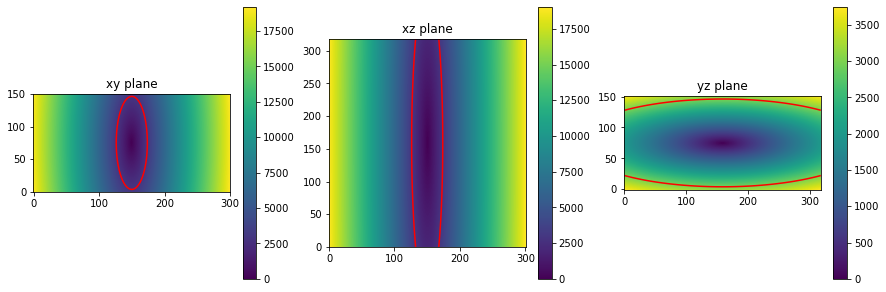

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(rad_grid[:,:,int(rad_grid.shape[2]/2)].T, origin='lower')
plt.colorbar()
plt.contour(rad_grid[:,:,int(rad_grid.shape[2]/2)].T, levels=[3000], colors='r')
plt.title('xy plane')

plt.subplot(1,3,2)
plt.imshow(rad_grid[:,int(rad_grid.shape[1]/2),:].T, origin='lower')
plt.colorbar()
plt.contour(rad_grid[:,int(rad_grid.shape[1]/2),:].T, levels=[3000], colors='r')
plt.title('xz plane')

plt.subplot(1,3,3)
plt.imshow(rad_grid[int(rad_grid.shape[0]/2),:,:], origin='lower')
plt.colorbar()
plt.contour(rad_grid[int(rad_grid.shape[0]/2),:,:], levels=[3000], colors='r')
plt.title('yz plane')